In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error
import os
import requests
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [37]:

def model_stealing(path_to_png_file: str):
    SERVER_URL = "http://34.71.138.79:9090"
    endpoint = "/modelstealing"
    TEAM_TOKEN = "X55E27lOG6LS3QRm"
    url = SERVER_URL + endpoint
    with open(path_to_png_file, "rb") as f:
        response = requests.get(url, files={"file": f}, headers={"token": TEAM_TOKEN})
        if response.status_code == 200:
            representation = response.json()["representation"]
            print("Request ok")
            return representation
        else:
            raise Exception(
                f"Model stealing failed. Code: {response.status_code}, content: {response.json()}"
            )

In [48]:
#model_stealing(["data/labels_ids_png/6661858_163933.png", "data/labels_ids_png/6661858_163973.png"])

In [38]:
def model_stealing_list_of_files(files_to_fetch, no_times=1):
    for file in files_to_fetch:
        directory = "representations/{}".format(file)
        if not os.path.exists(directory):
            os.makedirs(directory)
        for time in range(no_times):
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            representation = model_stealing("data/labels_ids_png/{}.png".format(file))
            np.savez(directory+"/{}_{}.npz".format(file, timestamp), representation=representation)

In [49]:
def load_file_representations(label_id):
    filenames = [filename for filename in os.listdir('representations/{}'.format(label_id))]
    reference_representation = np.load("representations/{}/{}".format(label_id, filenames[0]))["representation"]
    mse_list = []
    for filename in filenames:
        representation = np.load("representations/{}/{}".format(label_id, filename))["representation"]
        mse_list.append(mean_squared_error(reference_representation, representation))
    plt.plot(mse_list)
    #return mse_list

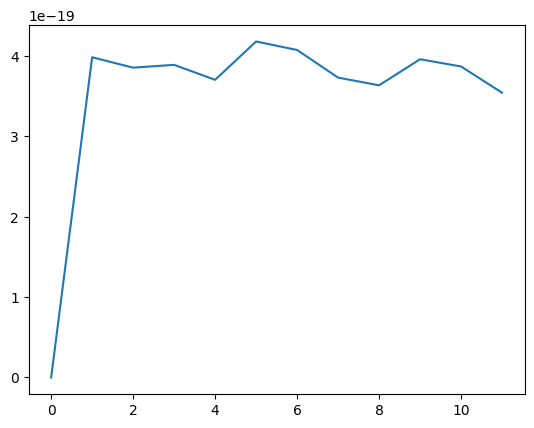

In [50]:
load_file_representations("6661858_163933")

In [45]:
model_stealing_list_of_files(["6661858_163973"], no_times=10)

Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok
Request ok


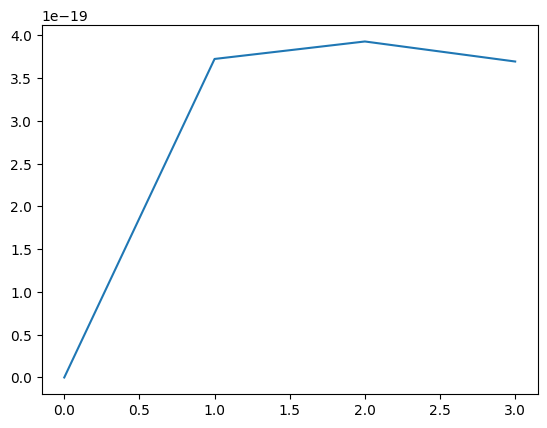

In [51]:
load_file_representations("6661858_163973")